In [1]:
import csv
import numpy as np
from heapq import nsmallest
import matplotlib.pyplot as plt

In [2]:
train_data = np.loadtxt("../data/galaxies_train.csv", delimiter=",", skiprows=1)
test_data = np.loadtxt("../data/galaxies_test.csv", delimiter=",", skiprows=1)

X_train = train_data[:,1:]
t_train = train_data[:,0]
X_test = test_data[:,1:]
t_test = test_data[:,0]
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of attributes: %i" % X_train.shape[1])

Number of training instances: 500
Number of test instances: 500
Number of attributes: 10


In [3]:
# NOTE: You are supposed to use this strucuture, i.e., 
# the pre-defined functions and variables. If you 
# have difficulties to keep this structure, you ARE 
# ALLOWED to adapt/change the code structure slightly!
# You might also want to add additional functions or
# variables.

class NearestNeighborRegressor:
    
    def __init__(self, n_neighbors=3, dist_measure="euclidean", dist_matrix=None):
        """
        Initializes the model.
        
        Parameters
        ----------
        n_neighbors : The number of nearest neigbhors (default 1)
        dist_measure : The distance measure used (default "euclidean")
        dist_matrix : The distance matrix if needed (default "None")
        """
        
        self.n_neighbors = n_neighbors
        self.dist_measure = dist_measure
        self.dist_matrix = dist_matrix
    
    def fit(self, X, t):
        """
        Fits the nearest neighbor regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        t : Array of length n_samples
        """ 
        
        self.X_train = X
        self.t_train = t
    
    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of length n_samples
        """         
        
        predictions = []
        if self.dist_measure == "euclidean":
            for i in range(X.shape[0]):
                distance = []
                for j in range(X_train.shape[0]):
                    distance.append(np.linalg.norm(X_train[j] - X[i]))
                smallestN = nsmallest(self.n_neighbors, distance)
                temp = []
                for j in range(self.n_neighbors):
                    temp.append(self.t_train[distance.index(smallestN[j])])
                predictions.append(sum(temp) / len(temp))
            predictions = np.array(predictions)
            return predictions
        
        if self.dist_measure == "dist_matrix":
            for i in range(X.shape[0]):
                distance = []
                for j in range(X_train.shape[0]):
                    temp = np.dot(self.dist_matrix, (X_train[j] - X[i]))
                    temp = np.dot((X_train[j] - X[i]).T, temp)
                    distance.append(temp)
                smallestN = nsmallest(self.n_neighbors, distance)
                temp = []
                for j in range(self.n_neighbors):
                    temp.append(self.t_train[distance.index(smallestN[j])])
                predictions.append(sum(temp) / len(temp))
            predictions = np.array(predictions)
            return predictions
    

In [4]:
KNN = NearestNeighborRegressor()
KNN.fit(X_train, t_train)
prediction = KNN.predict(X_test)

mDiag = [0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 1.0, 1.0]
M = np.diag(mDiag)
KNND = NearestNeighborRegressor(dist_measure = "dist_matrix", dist_matrix= M)
KNND.fit(X_train, t_train)
predDist = KNND.predict(X_test)
def rmse(t, tp):
        N = t.shape[0]
        sum = 0.0
        for i in range (N):
            sum = sum + (t[i] - tp[i]) ** 2
        rmse = np.sqrt(sum/N)
        return rmse
rmseTest = rmse(prediction, t_test)
print("rmse: ", rmseTest)
rmseTest2 = rmse(predDist, t_test)
print("rmse: ", rmseTest2)

rmse:  0.8243064553494787
rmse:  1.0997971796682453


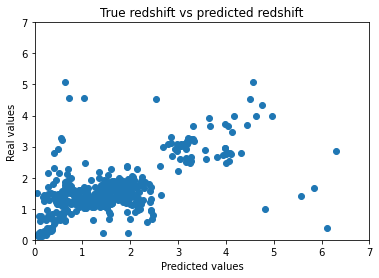

In [5]:
plt.figure()
plt.scatter(t_test, prediction)
plt.title("True redshift vs predicted redshift")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.xlim([0, 7])
plt.ylim([0, 7])
plt.show()

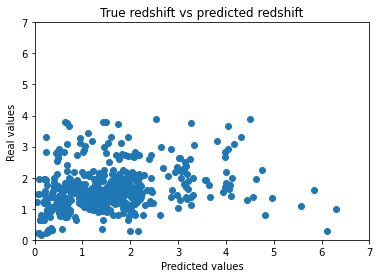

In [6]:
plt.figure()
plt.scatter(t_test, predDist)
plt.title("True redshift vs predicted redshift")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()